# Correlation searching for Airbnb data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data importation

In [2]:
data = pd.read_csv('Results/hosts_with_distances_cultural_red.csv')

## Pearson's correlations

### Pearson correlation computation for host_is_superhost

Here the correlation between 'host_is_superhost' and the distances to the different places is computed.

#### Selection of the data of interest

In [3]:
data_of_interest_1 = ['host_is_superhost'] + list(data.columns[-36:])
data_interest_1 = data[data_of_interest_1]

#### Correlation computation

In [4]:
correlations_1 = data_interest_1.corr(method='pearson')

#### Create the correlation Matrix

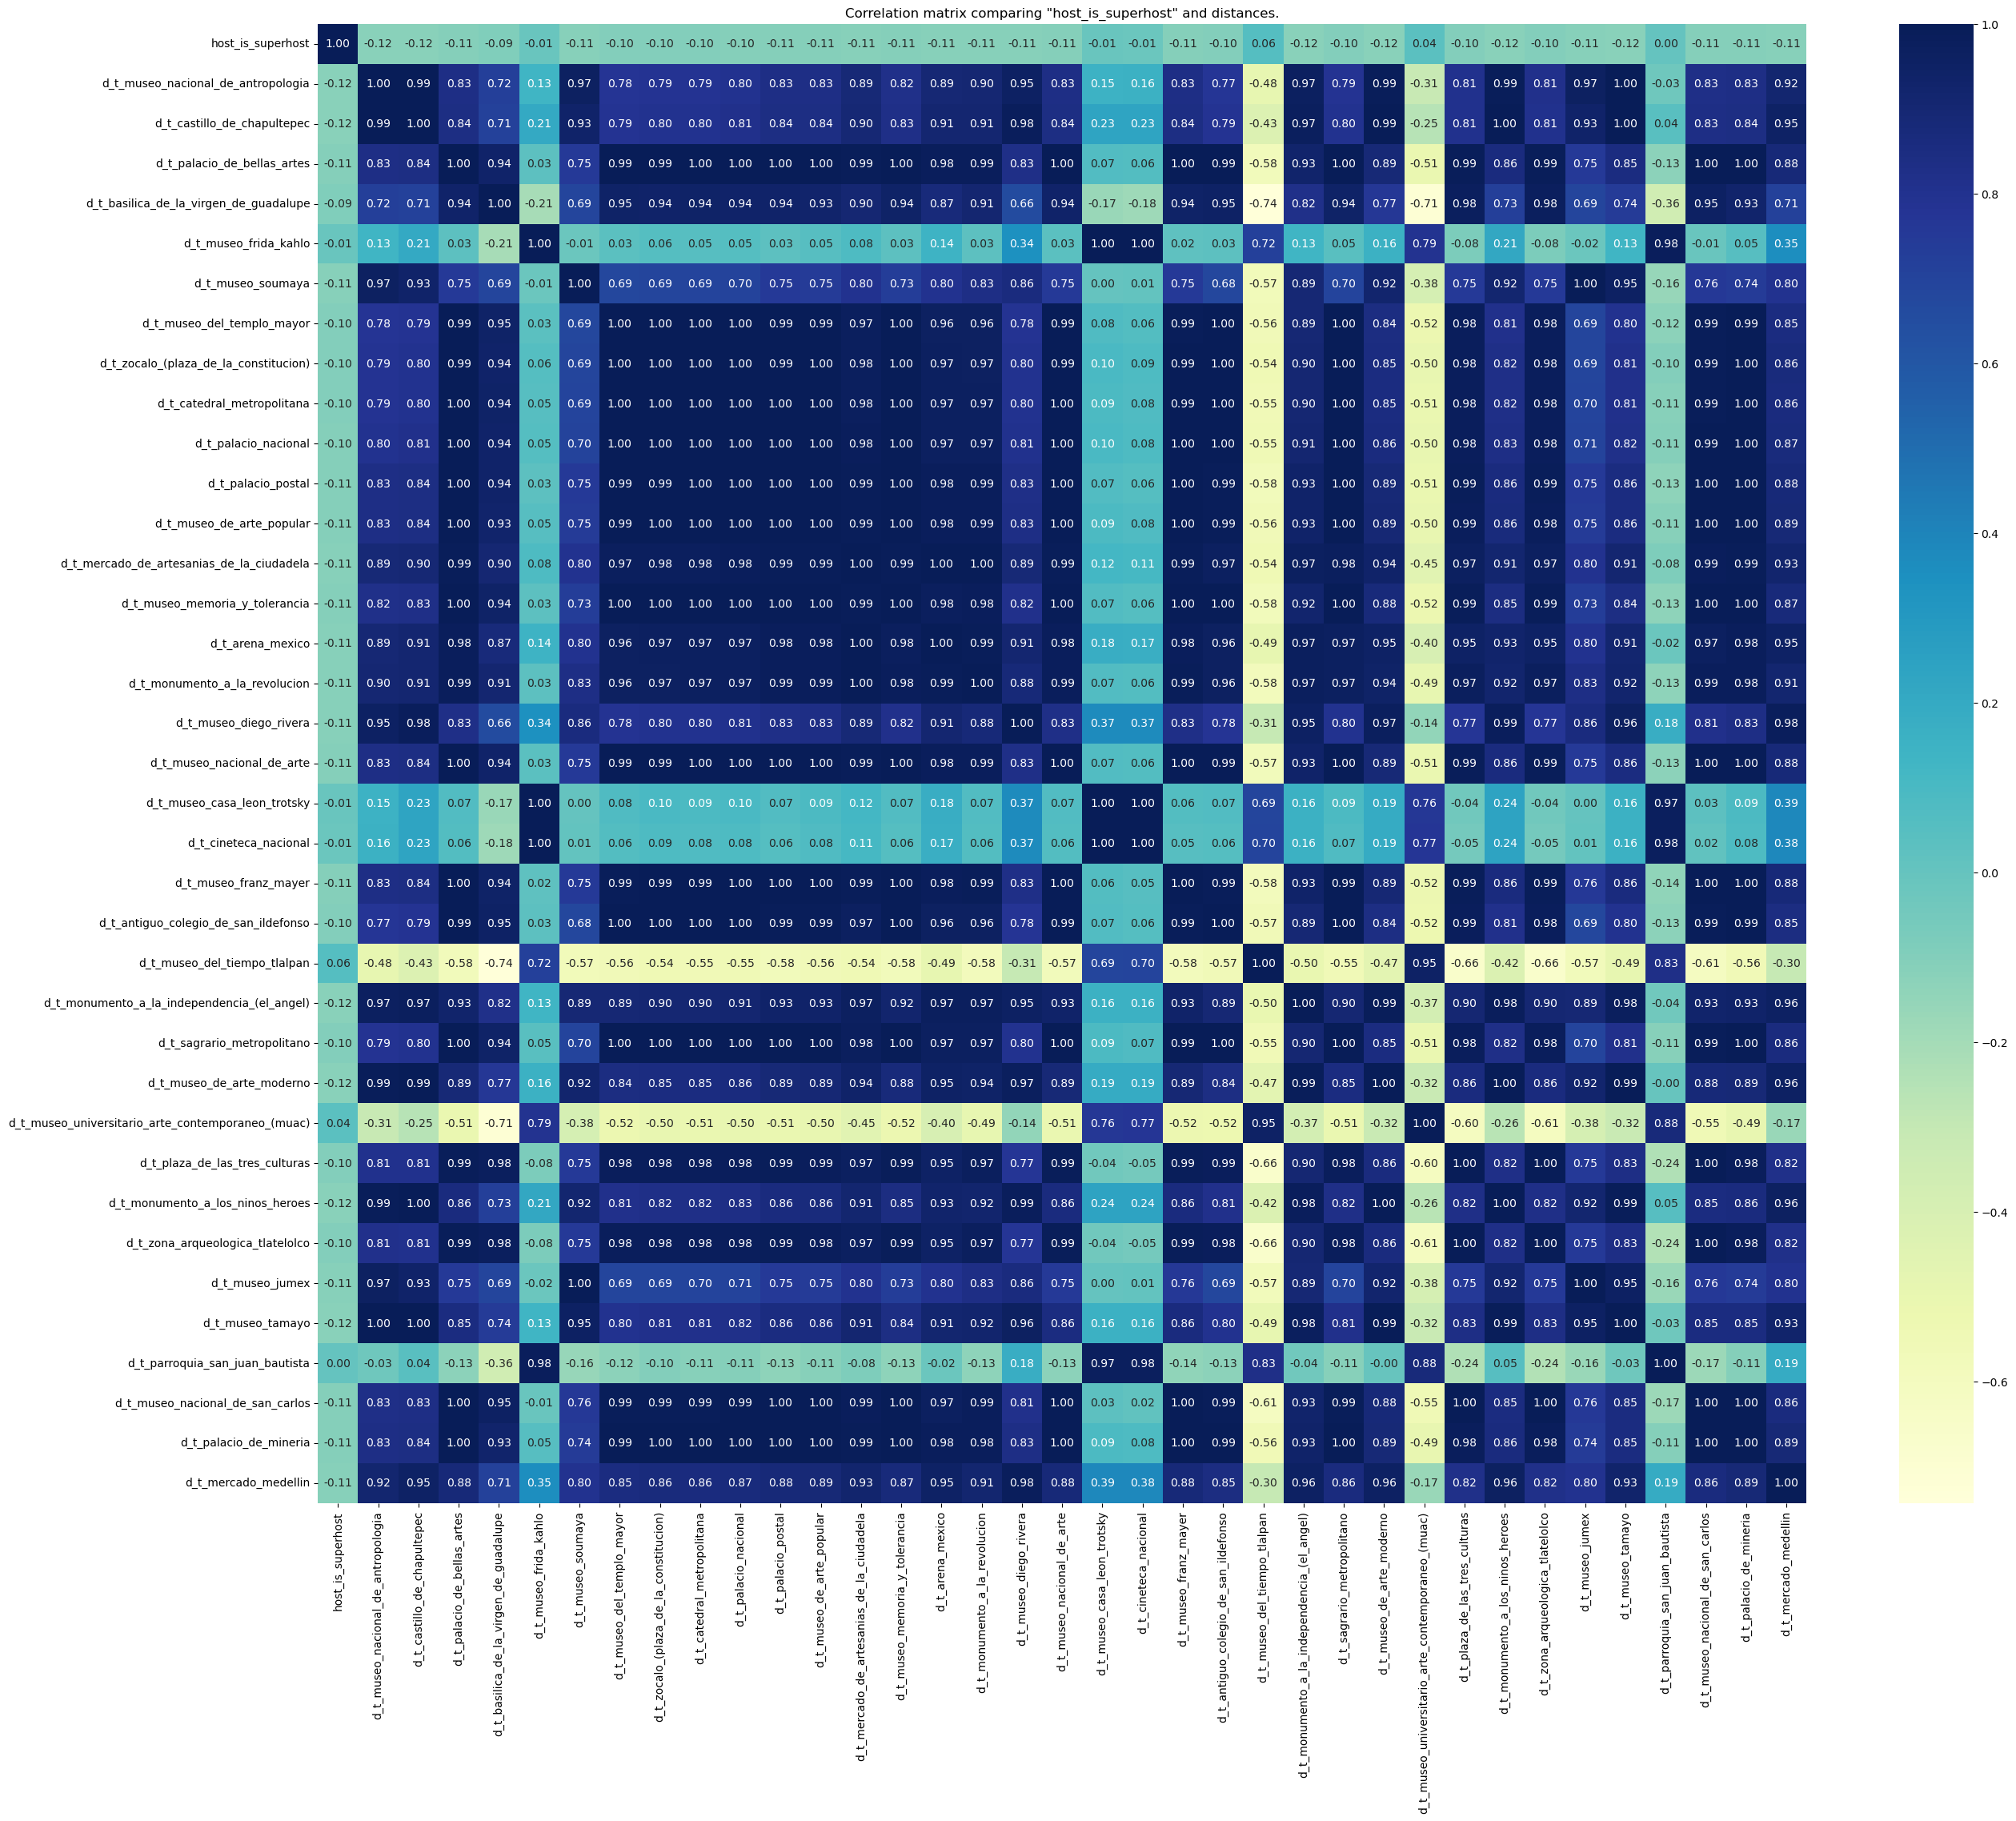

In [5]:
plt.figure(figsize=(30, 24))
sns.heatmap(correlations_1, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_is_superhost" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Show the correlations

In [6]:
correlations_1 = correlations_1.drop('host_is_superhost')
correlations_1['host_is_superhost']

d_t_museo_nacional_de_antropologia                  -0.118925
d_t_castillo_de_chapultepec                         -0.119125
d_t_palacio_de_bellas_artes                         -0.106908
d_t_basilica_de_la_virgen_de_guadalupe              -0.090155
d_t_museo_frida_kahlo                               -0.011982
d_t_museo_soumaya                                   -0.111929
d_t_museo_del_templo_mayor                          -0.101505
d_t_zocalo_(plaza_de_la_constitucion)               -0.102839
d_t_catedral_metropolitana                          -0.102833
d_t_palacio_nacional                                -0.104067
d_t_palacio_postal                                  -0.107035
d_t_museo_de_arte_popular                           -0.107313
d_t_mercado_de_artesanias_de_la_ciudadela           -0.111656
d_t_museo_memoria_y_tolerancia                      -0.105663
d_t_arena_mexico                                    -0.112171
d_t_monumento_a_la_revolucion                       -0.112434
d_t_muse

### Pearson correlation computation for host_total_listings_count

Here the correlation between 'host_total_listings_count' and the distances to the different places is computed.

#### Selection of the data of interest

In [7]:
data_of_interest_2 = ['host_total_listings_count'] + list(data.columns[-36:])
data_interest_2 = data[data_of_interest_2]

#### Correlation computation

In [8]:
correlations_2 = data_interest_2.corr(method='pearson')

#### Create the correlation Matrix

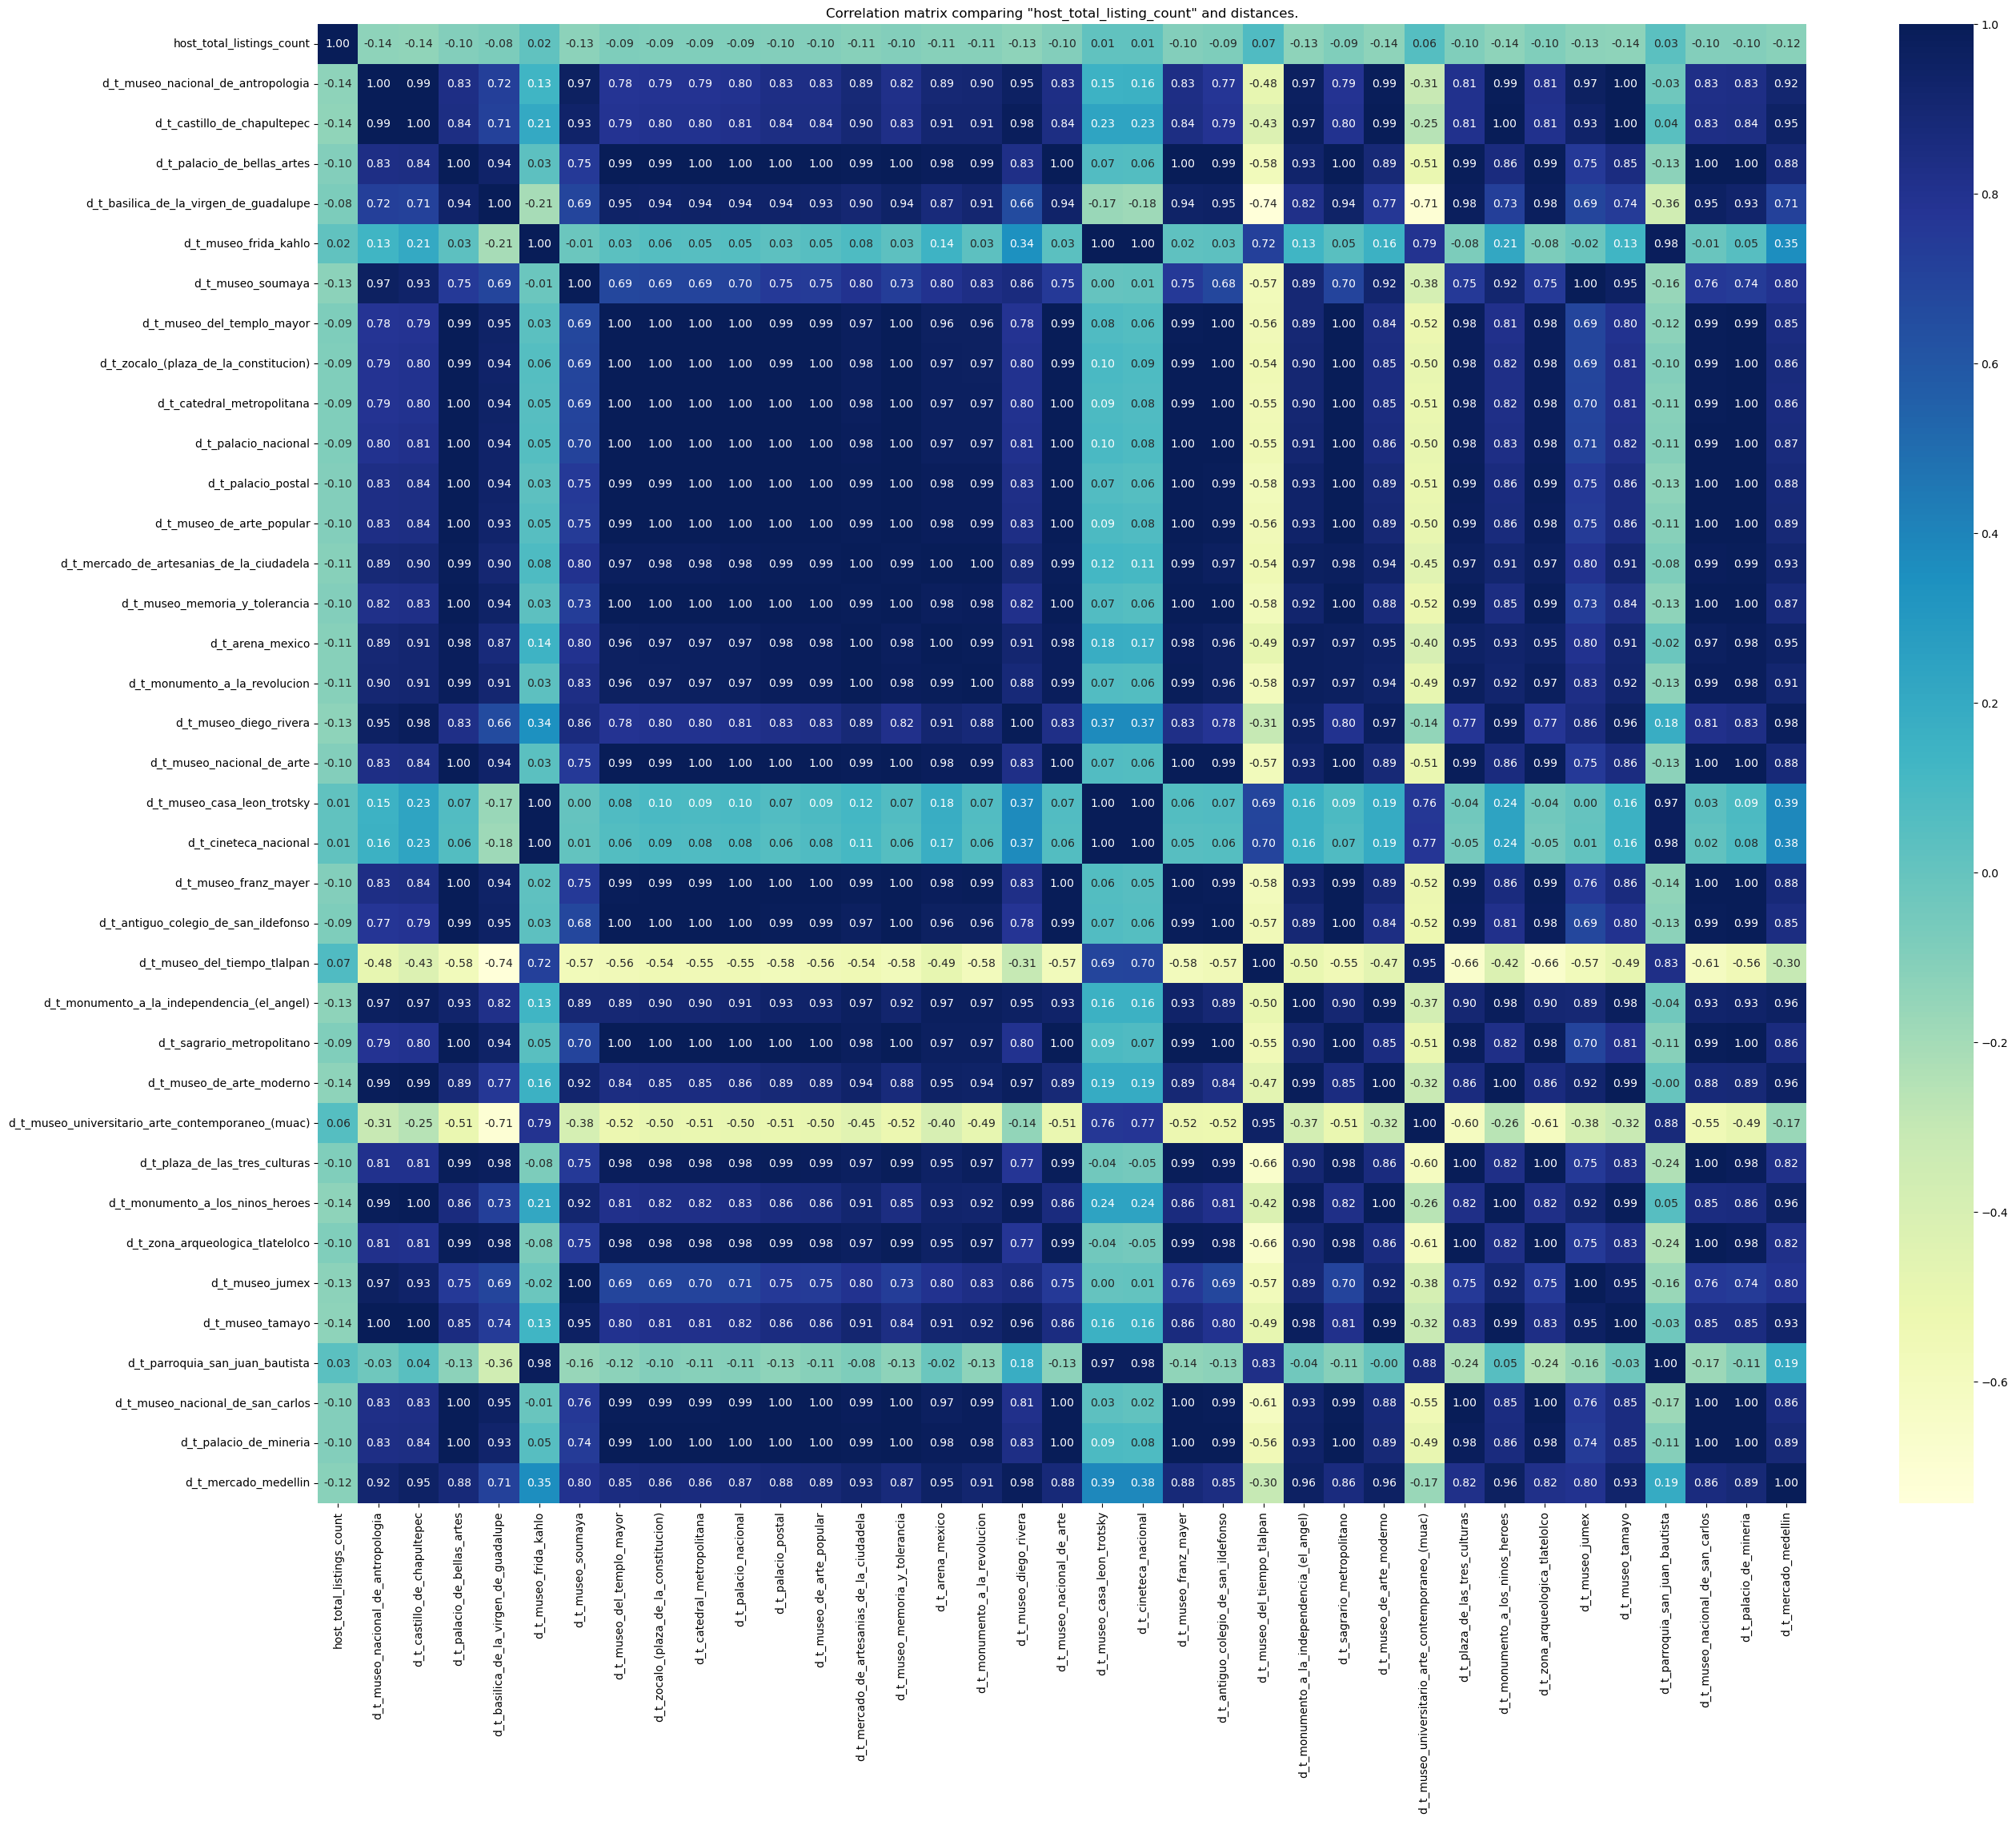

In [9]:
plt.figure(figsize=(30, 24))
sns.heatmap(correlations_2, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_total_listing_count" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Show the correlations

In [10]:
correlations_2 = correlations_2.drop('host_total_listings_count')
correlations_2['host_total_listings_count']

d_t_museo_nacional_de_antropologia                  -0.137181
d_t_castillo_de_chapultepec                         -0.137373
d_t_palacio_de_bellas_artes                         -0.099419
d_t_basilica_de_la_virgen_de_guadalupe              -0.082033
d_t_museo_frida_kahlo                                0.016590
d_t_museo_soumaya                                   -0.129411
d_t_museo_del_templo_mayor                          -0.089220
d_t_zocalo_(plaza_de_la_constitucion)               -0.090425
d_t_catedral_metropolitana                          -0.090788
d_t_palacio_nacional                                -0.092628
d_t_palacio_postal                                  -0.099738
d_t_museo_de_arte_popular                           -0.099538
d_t_mercado_de_artesanias_de_la_ciudadela           -0.110050
d_t_museo_memoria_y_tolerancia                      -0.096972
d_t_arena_mexico                                    -0.111974
d_t_monumento_a_la_revolucion                       -0.113702
d_t_muse

### Pearson correlation computation for host_id

Here the correlation between 'host_id' and the distances to the different places is computed.

#### Selection of the data of interest

In [11]:
host_id_counts = data['host_id'].value_counts().to_frame(name='host_listing_count')
data_with_counts = data.join(host_id_counts, on='host_id')
data_of_interest_3 = ['host_listing_count'] + list(data.columns[-36:])
data_interest_3 = data_with_counts[data_of_interest_3]

#### Correlation computation

In [12]:
correlations_3 = data_interest_3.corr(method='pearson')

#### Create the correlation Matrix

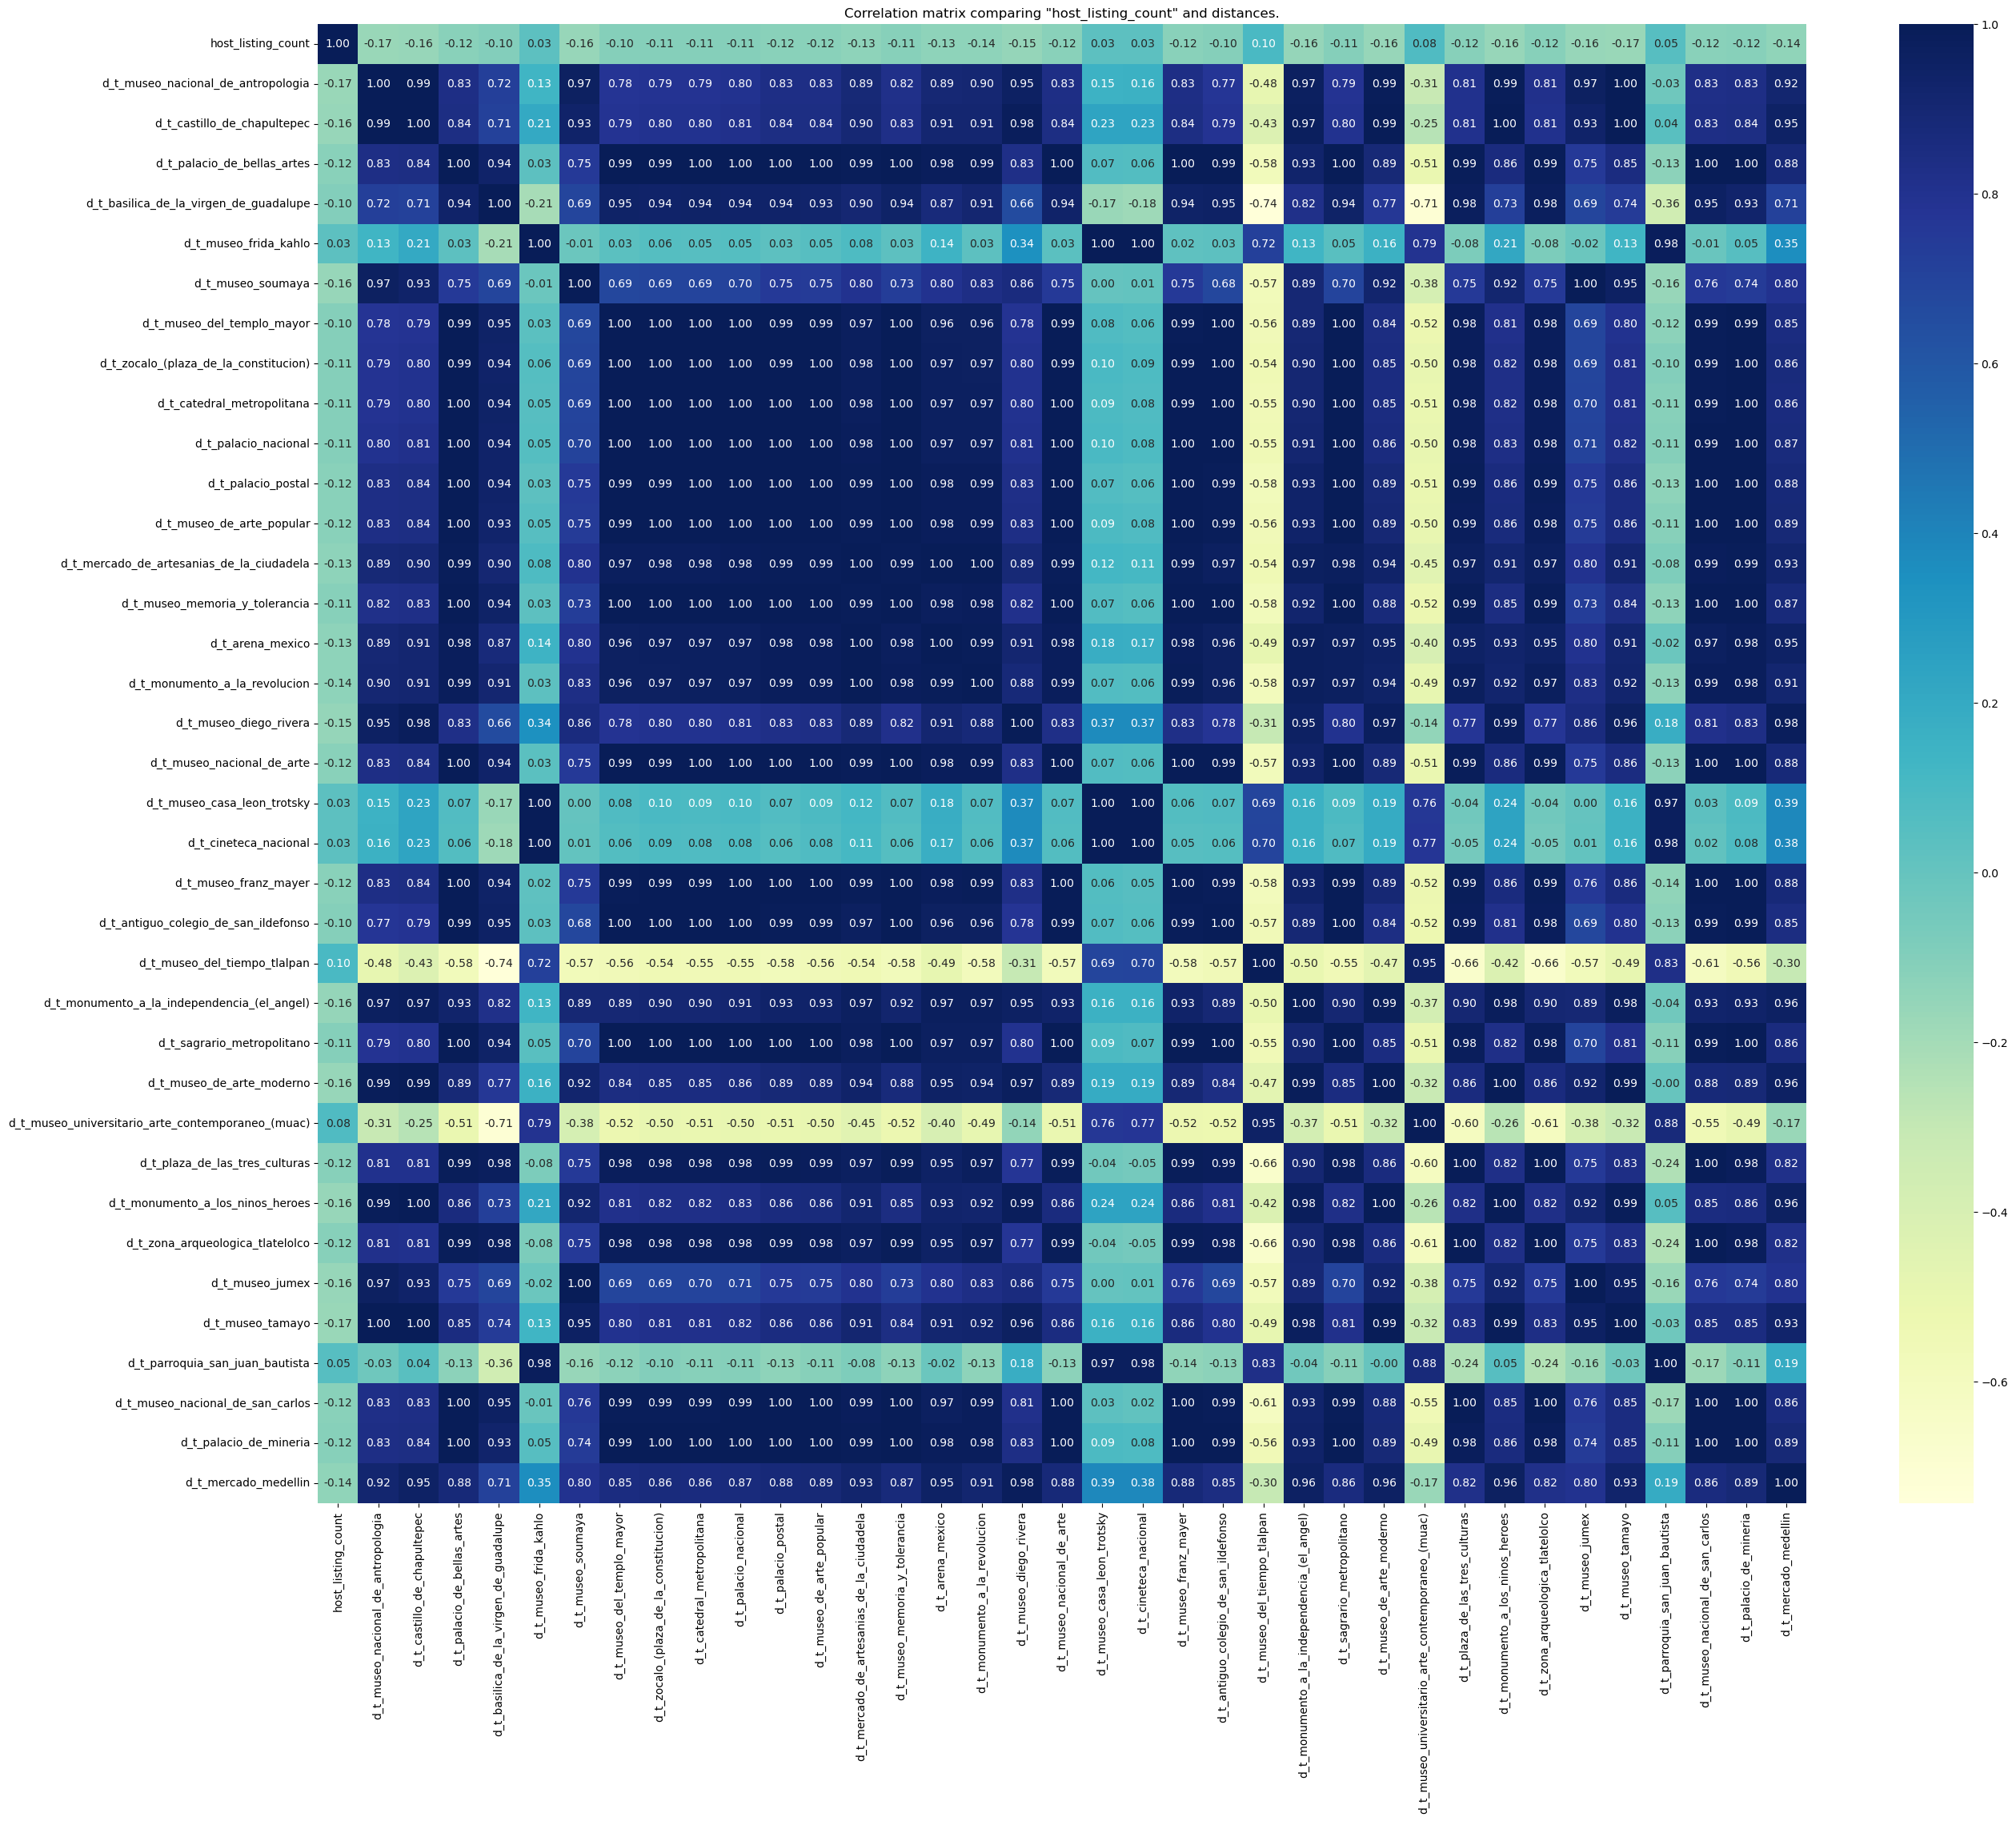

In [13]:
plt.figure(figsize=(30, 24))
sns.heatmap(correlations_3, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Correlation matrix comparing "host_listing_count" and distances.')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Show the correlations

In [14]:
correlations_3 = correlations_3.drop('host_listing_count')
correlations_3['host_listing_count']

d_t_museo_nacional_de_antropologia                  -0.165999
d_t_castillo_de_chapultepec                         -0.164362
d_t_palacio_de_bellas_artes                         -0.117393
d_t_basilica_de_la_virgen_de_guadalupe              -0.102000
d_t_museo_frida_kahlo                                0.030772
d_t_museo_soumaya                                   -0.160900
d_t_museo_del_templo_mayor                          -0.103805
d_t_zocalo_(plaza_de_la_constitucion)               -0.105220
d_t_catedral_metropolitana                          -0.105751
d_t_palacio_nacional                                -0.108138
d_t_palacio_postal                                  -0.117843
d_t_museo_de_arte_popular                           -0.117428
d_t_mercado_de_artesanias_de_la_ciudadela           -0.131236
d_t_museo_memoria_y_tolerancia                      -0.114086
d_t_arena_mexico                                    -0.132780
d_t_monumento_a_la_revolucion                       -0.136948
d_t_muse